# Applied Statistics Project

## Description 
The data at hand contains medical costs of people characterized by certain attributes. Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

## Domain
Healthcare

## Attribute Information

age: age of primary beneficiary
sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body weights that are relatively high or low relative to height, objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

charges: Individual medical costs billed by health insurance.

## 1. Importing Libraries

In [1]:
# Import necessary libraries for dataframe handling, array handling & visualization and alias them
# Import stats from scipy library for hypothesis testing and LabelEncoder for transforming categorical to continuous variables
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

## 2. Reading data using Pandas

In [2]:
#Read the insurance file into a dataframe df
df = pd.read_csv('C:\\Users\\Srikanta\\Desktop\\Great Learning\\Applied Stats\\Applied_Stats_Project\\insurance.csv')

#Check the data is correctly read into a dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3. Exploratory Data Analysis (EDA)

In [3]:
#Shape of the data
df.shape
print('The Insurance data has %d rows and %d columns'%(df.shape[0],df.shape[1]))

The Insurance data has 1338 rows and 7 columns


In [4]:
#Data types of the different features
print('The variables are listed below along with the number of entries, missing values if any and data types:')
df.info()

The variables are listed below along with the number of entries, missing values if any and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#Number of missing values in each attribute
print('Total number of missing values under each variable: \n%s' %(df.isna().sum()))

Total number of missing values under each variable: 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


There are no missing values in the data

### Summary Statistics

In [6]:
#Five point summary of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


##### From the summary statistics we can infer the following on the continuous variables:
- Age variable has a reasonably high standard deviation 
- BMI variable has a normal distribution and about two thirds of the customers have BMI in the range 24 to 36
- Half of the customers have single or no child
- Charges variable has outliers as we see a significant difference in the IQR & maximum value and the data is positively skewed

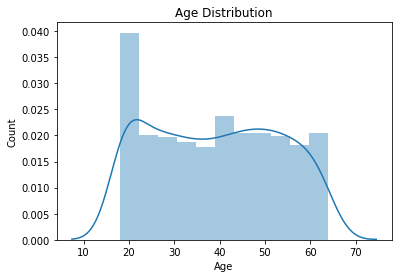

In [7]:
#Distribution of Age
sns.distplot(df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

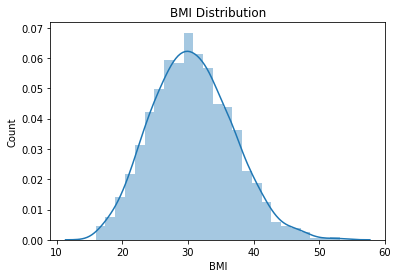

In [8]:
#Distribution of BMI
sns.distplot(df['bmi'])
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('BMI Distribution')
plt.show()

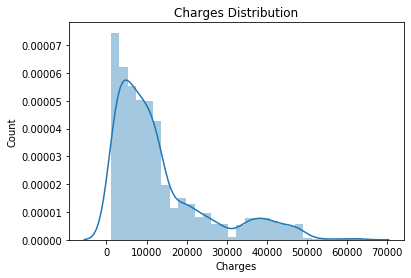

In [9]:
#Distribution of Charges
sns.distplot(df['charges'])
plt.xlabel('Charges')
plt.ylabel('Count')
plt.title('Charges Distribution')
plt.show()

In [10]:
#Skewness of Age, BMI and Charges
df[['age','bmi','charges']].skew(axis = 0)

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

##### From the distribution plots and the measure of skewness we can infer the following:
- Age variable has multi modal distribution with high standard deviation
- BMI variable is normally distributed as we see in the distrbution
- Charges variable is positively skewed as seen in the graph and from the skewness value


### Outlier Detection 

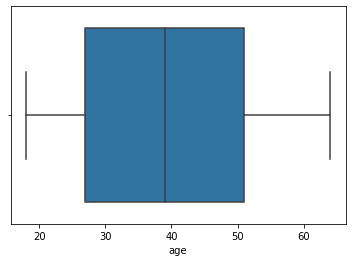

In [11]:
# Box plot of Age variable
sns.boxplot(df['age'])
plt.show()

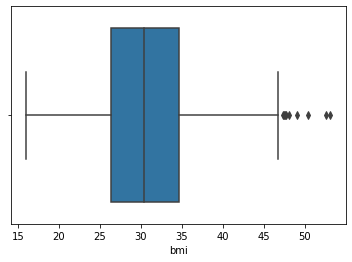

In [12]:
# Box plot of BMI variable
sns.boxplot(df['bmi'])
plt.show()

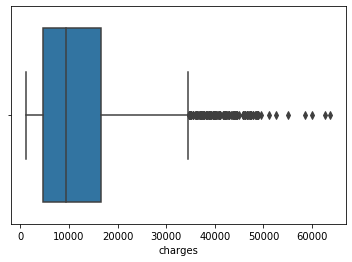

In [13]:
# Box plot of Charges variable
sns.boxplot(df['charges'])
plt.show()

##### The following are the outcomes of outlier detection
- Range is high in the age variable and we observe no outliers
- Since the range in BMI is narrow, we notice a few outliers in this variable
- There are a high number of outliers in the charges variable

### Distribution of Categorical variables

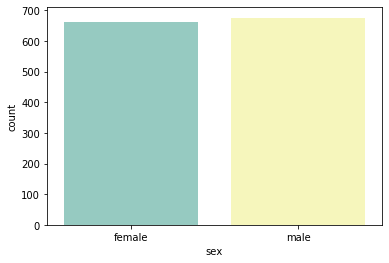

The share of men and women holding policies are: 
male      676
female    662
Name: sex, dtype: int64


In [14]:
sns.countplot(df['sex'],palette='Set3')
plt.show()
print('The share of men and women holding policies are: \n%s'%df['sex'].value_counts())

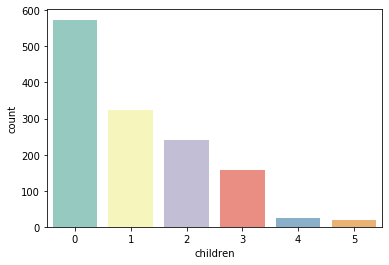

The number of children the policy holders have: 
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


In [15]:
sns.countplot(df['children'],palette='Set3')
plt.show()
print('The number of children the policy holders have: \n%s'%df['children'].value_counts())

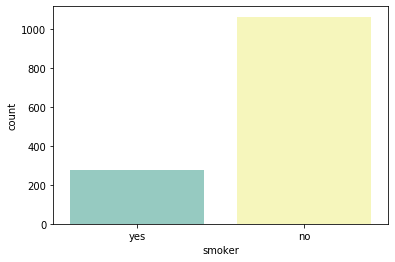

The number of smoking to non smoking population is as below:
no     1064
yes     274
Name: smoker, dtype: int64


In [16]:
sns.countplot(df['smoker'],palette='Set3')
plt.show()
print('The number of smoking to non smoking population is as below:\n%s'%df['smoker'].value_counts())

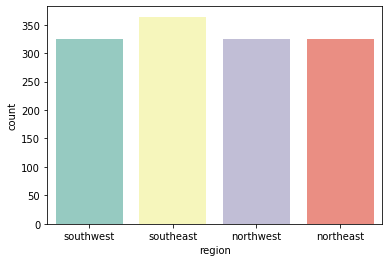

The region of the policy holders are as below:
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


In [17]:
sns.countplot(df['region'],palette='Set3')
plt.show()
print('The region of the policy holders are as below:\n%s' %df['region'].value_counts())

##### The following can be inferred about the categorical variables:
- The number of men and women policy holders are almost equally distributed
- Close to half the overall policy holders have no children(574) and another significant number (564) have one to two children
- Close to 75% in the data does not smoke
- The policy holders are distributed almost equally in all 4 regions

### Pairplot

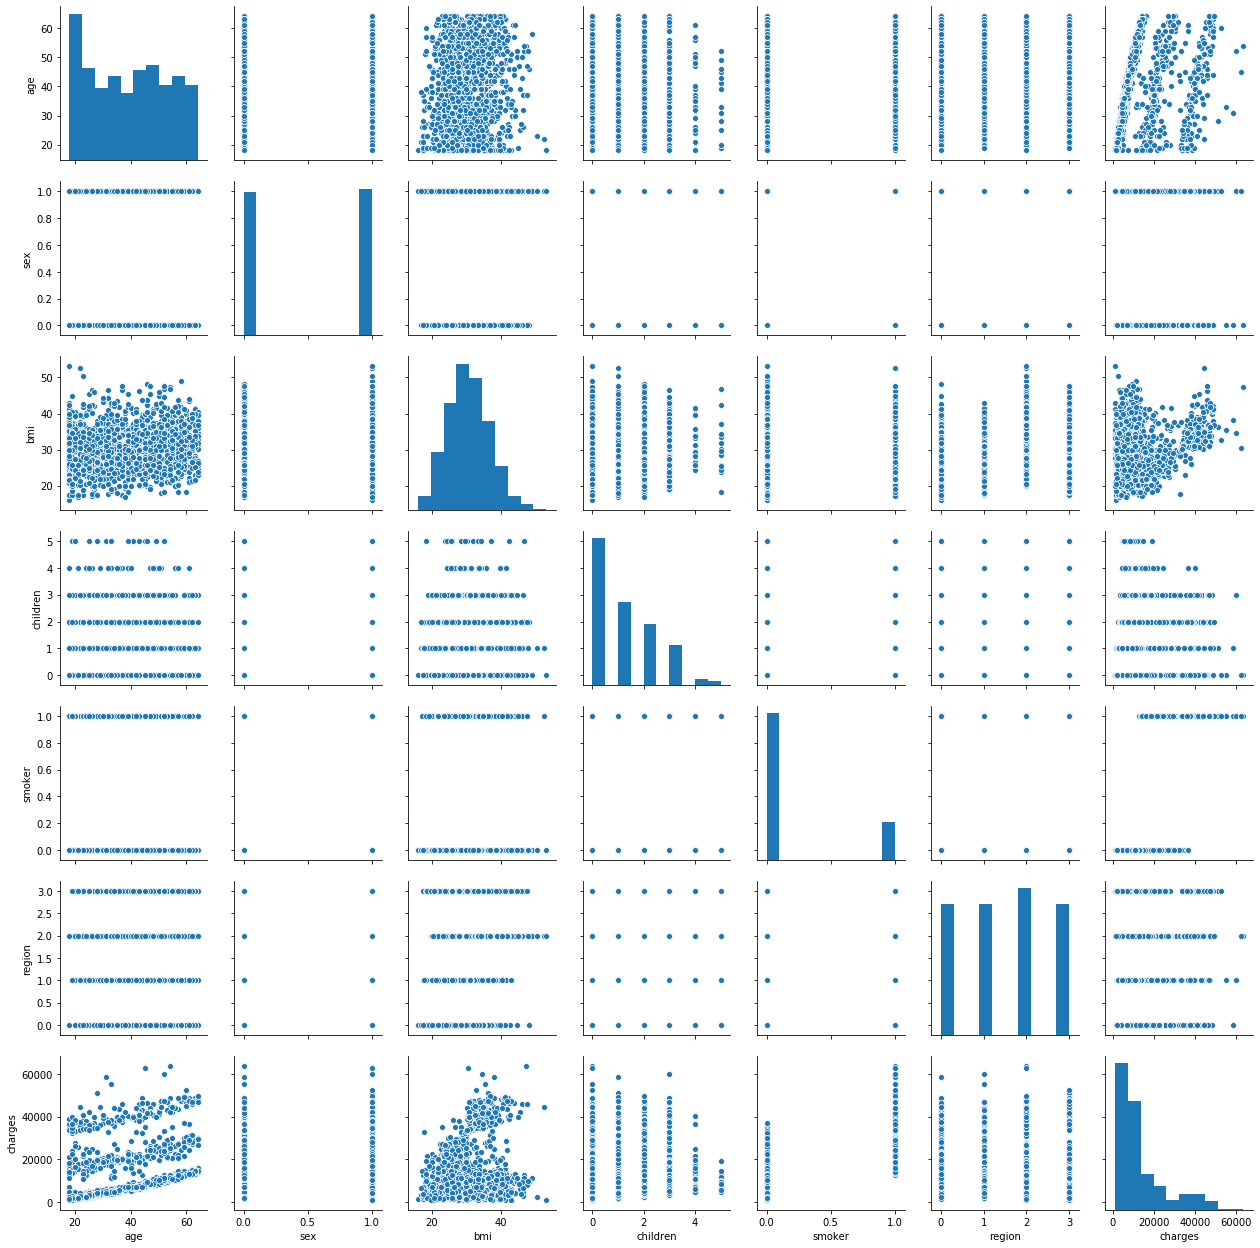

In [18]:
#Pairplot showing the relationships of different variables
transform_df = df.copy()
transform_df.loc[:,['sex','smoker','region']] = df.loc[:,['sex','smoker','region']].apply(LabelEncoder().fit_transform)
sns.pairplot(transform_df)
plt.show()

#### Charges seems to be related to smoking

## 4. Variation of Attributes

### Smoker vs Charges

,charges
smoker,
no,8434.268298
yes,32050.231832


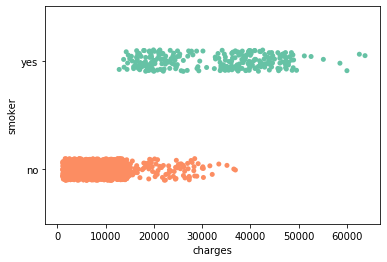

In [19]:
sns.stripplot(df['charges'],df['smoker'],palette='Set2')
df[['smoker','charges']].groupby('smoker').mean()

##### From the above table and visualization it seems that people who smoke on an average have charges about 4 times more than that of a non smoker

#### Two sample t-test to check the effect of smoking on charges

In [20]:
#Null hypothesis
H0 = 'Smokers and non smokers have the same charges' 

#Alternate hypothesis
H1  = 'Smokers and non smokers do not have the same charges'

#Charges of smokers
yes = np.array(df[df['smoker'] == 'yes']['charges'])

#Charges of non smokers
no = np.array(df[df['smoker'] == 'no']['charges'])

#Independent t-test
t,p_value = stats.ttest_ind(yes,no)
t,p_value

(46.664921172723716, 8.271435842177219e-283)

##### At a significance level of 0.05, as the p-value is less than 0.05 we reject the null hypothesis. Hence, charges of people who smoke differ significantly from those who dont.

### BMI vs Sex

,bmi
sex,
female,30.377749
male,30.943129


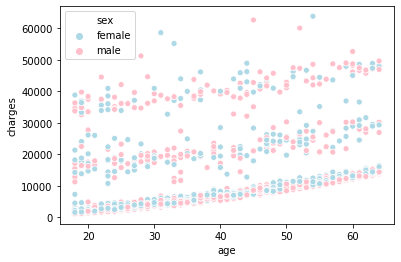

In [21]:
sns.scatterplot(df['age'],df['charges'],hue = df['sex'],palette =['lightblue','pink'])
df[['bmi','sex']].groupby('sex').mean()

##### From the above visualization and table, it appears the BMIs of men and women are almost the same.


#### Two sample t-test to check the variation of BMI by Gender

In [22]:
#Null hypothesis
H0 = 'Men and women have the same BMI' 

#Alternate hypothesis
H1  = 'Men and women do not have the same BMI'

#BMI of men
male = np.array(df[df['sex'] == 'male']['bmi'])

#BMI of women
female = np.array(df[df['sex'] == 'female']['bmi'])

#Independent t-test
t,p_value = stats.ttest_ind(male,female)
t,p_value


(1.696752635752224, 0.08997637178984934)

##### At a significance level of 0.05, as the p-value is greater than 0.05 we fail to reject the null hypothesis. Hence, BMI of people does not depend on gender.

### Smokers by Gender

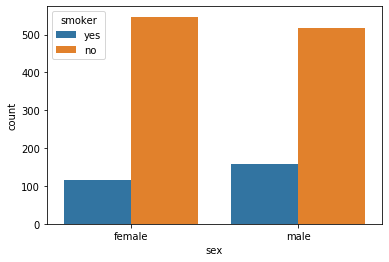

In [23]:
sns.countplot(df['sex'],hue=df['smoker'])
plt.show()

In [24]:
df.groupby('sex').mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [25]:
prop=pd.crosstab(df['sex'],df['smoker'])
smoking_percent = prop.div(prop.sum(axis=1), axis=0)
smoking_percent

smoker,no,yes
sex,,
female,0.826284,0.173716
male,0.764793,0.235207


##### We see above that the percentage of men who smoke is higher (23.52%) than that of women (17.37%) 

#### Chi squared test to check the dependency of gender on smoking habit 

In [26]:
#Null hypothesis
H0 = 'Men and women have the same smoking habits' 

#Alternate hypothesis
H1  = 'Men and women do not have the same smoking habits'

chi,p_value,dof,exp = stats.chi2_contingency(prop)
chi,p_value,dof,exp

(7.39291081459996,
 0.006548143503580696,
 1,
 array([[526.43348281, 135.56651719],
        [537.56651719, 138.43348281]]))

##### At a significance level of 0.05, as the p-value is less than 0.05 we reject the null hypothesis. Hence, gender has an influence on smoking habits.

### BMI distribution of women by children

In [27]:
women_bmi = df[['sex','children','bmi']]
women_bmi = women_bmi[women_bmi['sex']=='female']
women_bmi.head()

,sex,children,bmi
0,female,0,27.90
5,female,0,25.74
6,female,1,33.44
7,female,3,27.74
9,female,0,25.84


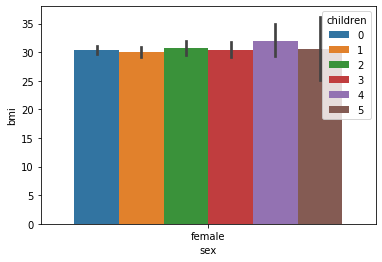

In [28]:
sns.barplot(women_bmi['sex'],women_bmi['bmi'],hue =women_bmi['children'])
plt.show()

In [29]:
pd.pivot_table(women_bmi,'bmi',index=['children'],columns=['sex'])

sex,female
children,
0,30.361522
1,30.052658
2,30.649790
3,30.436429
4,31.943182
5,30.620625


##### The pivot table and visualization indicate no significant impact on the BMI of mothers w.r.t number of children

#### ANOVA test to check the dependency of BMI on children

In [30]:
#Null hypothesis
H0 = 'Number of children has an effect on BMI' 

#Alternate hypothesis
H1  = 'Number of children has no effect on BMI'

zero_child = women_bmi[women_bmi['children'] == 0]['bmi']
one_child = women_bmi[women_bmi['children'] == 1]['bmi']
two_child = women_bmi[women_bmi['children'] == 2]['bmi']
three_child = women_bmi[women_bmi['children'] == 3]['bmi']
four_child = women_bmi[women_bmi['children'] == 4]['bmi']
five_child = women_bmi[women_bmi['children'] == 5]['bmi']

f_stat,p_value = stats.f_oneway(zero_child,one_child,two_child)
f_stat,p_value

(0.3344720147757968, 0.7158579926754841)

##### At a significance level of 0.05, as the p-value is greater than 0.05 we fail to reject the null hypothesis. Hence, number of children has no influence on BMI of mothers.

# Conculsion:
### From the data and the different tests we ran, the following can be concluded:
- Smokers have high charges
- Gender has no influence on BMI
- Smoking is influenced by gender
- BMI of women is not influenced by the number of children they have